#### Notes
F1 scoring chosen for hyperparameter tuning in order to minimize false positives as well as false negatives.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats
import scipy.sparse
from skopt import BayesSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import RBFSampler
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import f1_score, confusion_matrix, make_scorer
import pickle

### Random Forest hyperparameters

In [2]:
rf_params = {
    'criterion':['gini','entropy'],
    'max_depth':np.linspace(0,50),
    'min_samples_leaf':np.linspace(1,10),
    'n_estimators':np.linspace(1,100),
    'class_weight': ['balanced'],
    'max_features':[None,1,2,3,4,5,6,7,8,9,10],
    'min_impurity_decrease':np.linspace(0,0.25,6),
    'random_state': [42],
    'n_jobs':[-1],
    'verbose':[2]
}

### Import data

In [3]:
print('Importing data...')
data_path = r'../data/clean_df.csv.gz'
df = pd.read_csv(data_path)
print('Done.')

print('Engineering features...')
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'])
df['CRASH TIME'] = pd.to_datetime(df['CRASH TIME'])

df['CASUALTIES?'] = 0
mask = df['TOTAL PEDESTRIAN CASUALTIES'] != 0
df.loc[mask, 'CASUALTIES?'] = 1
df.loc[df['TOTAL PEDESTRIAN CASUALTIES'] != 1, ['TOTAL PEDESTRIAN CASUALTIES','CASUALTIES?']].sample(5)
print('Done.')

Importing data...
Done.
Engineering features...
Done.


### K-Means analysis

Manhattan K-Means analysis
# Clusters: 2
    F1 score: 0.15515549240482224
# Clusters: 3
    F1 score: 0.1637895500486389
# Clusters: 4
    F1 score: 0.1626919431279621
# Clusters: 5
    F1 score: 0.1589645469893078
# Clusters: 6
    F1 score: 0.16284135753749016
# Clusters: 7
    F1 score: 0.16458218040951855
# Clusters: 8
    F1 score: 0.16497587131367292
# Clusters: 9
    F1 score: 0.15652173913043477
# Clusters: 10
    F1 score: 0.16453122223757727
# Clusters: 11
    F1 score: 0.16567217972848503
# Clusters: 12
    F1 score: 0.16745210531707816
# Clusters: 13
    F1 score: 0.16803520391961166
# Clusters: 14
    F1 score: 0.16788045020334816
# Clusters: 15
    F1 score: 0.170974436373927
# Clusters: 16
    F1 score: 0.16794900978829957
# Clusters: 17
    F1 score: 0.16536799482799688
# Clusters: 18
    F1 score: 0.166460941632869
# Clusters: 19
    F1 score: 0.17008464466284157
# Clusters: 20
    F1 score: 0.17136943353727208
# Clusters: 21
    F1 score: 0.16961865914752663
# Cluste

# Clusters: 71
    F1 score: 0.1854831153882189
# Clusters: 72
    F1 score: 0.18527810910486844
# Clusters: 73
    F1 score: 0.18564768110805138
# Clusters: 74
    F1 score: 0.18404187139500106
# Clusters: 75
    F1 score: 0.18429478627461446
# Clusters: 76
    F1 score: 0.18453925050883982
# Clusters: 77
    F1 score: 0.1850346837417395
# Clusters: 78
    F1 score: 0.18542105192593883
# Clusters: 79
    F1 score: 0.18515647313231873
# Clusters: 80
    F1 score: 0.18622729865616006
# Clusters: 81
    F1 score: 0.18614248770618105
# Clusters: 82
    F1 score: 0.18625483934778309
# Clusters: 83
    F1 score: 0.18777103777169285
# Clusters: 84
    F1 score: 0.18787040179620398
# Clusters: 85
    F1 score: 0.18787040179620398
# Clusters: 86
    F1 score: 0.1857146543493407
# Clusters: 87
    F1 score: 0.18807076136304338
# Clusters: 88
    F1 score: 0.1858989737438358
# Clusters: 89
    F1 score: 0.18718293543533548
# Clusters: 90
    F1 score: 0.18700995973723247
# Clusters: 91
    F1 sc

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.09134045077105576
# Clusters: 3
    F1 score: 0.08893266727643707
# Clusters: 4
    F1 score: 0.08694913815063257
# Clusters: 5
    F1 score: 0.09013536516170868
# Clusters: 6
    F1 score: 0.09580246913580247
# Clusters: 7
    F1 score: 0.09410582719356998
# Clusters: 8
    F1 score: 0.09283276450511946
# Clusters: 9
    F1 score: 0.09245790574872968
# Clusters: 10
    F1 score: 0.10507647971624919
# Clusters: 11
    F1 score: 0.10389170896785109
# Clusters: 12
    F1 score: 0.10401490767406404
# Clusters: 13
    F1 score: 0.10393557210150432
# Clusters: 14
    F1 score: 0.10330765745355686
# Clusters: 15
    F1 score: 0.10210803689064558
# Clusters: 16
    F1 score: 0.09965733866362081
# Clusters: 17
    F1 score: 0.10242941562705189
# Clusters: 18
    F1 score: 0.10043774319066148
# Clusters: 19
    F1 score: 0.10071942446043165
# Clusters: 20
    F1 score: 0.10092363144852445
# Clusters: 21
    F1 score: 0.10466197370168681
# Clusters: 22
    F1 score:

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.12824271782777744
# Clusters: 3
    F1 score: 0.12878590233142803
# Clusters: 4
    F1 score: 0.12369392564741782
# Clusters: 5
    F1 score: 0.1266845927190172
# Clusters: 6
    F1 score: 0.12844036697247704
# Clusters: 7
    F1 score: 0.13082278361602173
# Clusters: 8
    F1 score: 0.13216458533461414
# Clusters: 9
    F1 score: 0.13070482330280278
# Clusters: 10
    F1 score: 0.12898069207622864
# Clusters: 11
    F1 score: 0.13232065887932828
# Clusters: 12
    F1 score: 0.13033342937216794
# Clusters: 13
    F1 score: 0.12777695680015763
# Clusters: 14
    F1 score: 0.1297609065731636
# Clusters: 15
    F1 score: 0.12998952492451782
# Clusters: 16
    F1 score: 0.1331953853567278
# Clusters: 17
    F1 score: 0.13448264687773423
# Clusters: 18
    F1 score: 0.13514918390685102
# Clusters: 19
    F1 score: 0.13831489134782032
# Clusters: 20
    F1 score: 0.13560457438154938
# Clusters: 21
    F1 score: 0.13716217314286644
# Clusters: 22
    F1 score: 0.

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


# Clusters: 2
    F1 score: 0.1488804130666044
# Clusters: 3
    F1 score: 0.14153744638733093
# Clusters: 4
    F1 score: 0.14746004275679528
# Clusters: 5
    F1 score: 0.1515351008438566
# Clusters: 6
    F1 score: 0.14688724177775273
# Clusters: 7
    F1 score: 0.1508057523843693
# Clusters: 8
    F1 score: 0.15057890762647874
# Clusters: 9
    F1 score: 0.15546142427862858
# Clusters: 10
    F1 score: 0.15478209571565518
# Clusters: 11
    F1 score: 0.14986281497366677
# Clusters: 12
    F1 score: 0.14981082885575303
# Clusters: 13
    F1 score: 0.15131989191436293
# Clusters: 14
    F1 score: 0.15088552785879664
# Clusters: 15
    F1 score: 0.15070328198258542
# Clusters: 16
    F1 score: 0.1557586581223518
# Clusters: 17
    F1 score: 0.1572384738219006
# Clusters: 18
    F1 score: 0.15790847723119383
# Clusters: 19
    F1 score: 0.1512672990203701
# Clusters: 20
    F1 score: 0.15578544061302685
# Clusters: 21
    F1 score: 0.1596130592503023
# Clusters: 22
    F1 score: 0.1533

<ipython-input-4-962d46633226>:35: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  _ = plt.subplot(236)


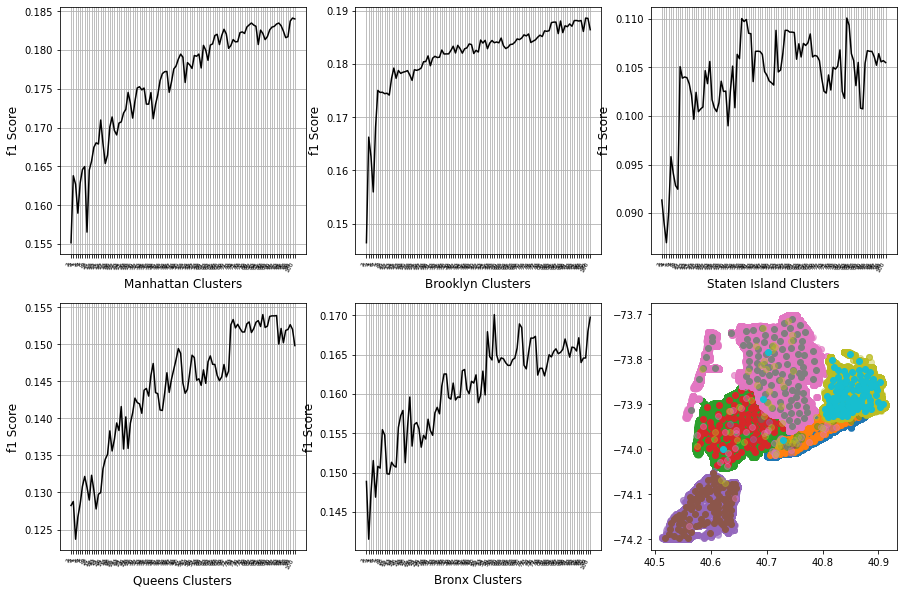

In [4]:
boroughs = ['MANHATTAN','BROOKLYN','STATEN ISLAND','QUEENS','BRONX']
subplots = [231,232,233,234,235]
k_range = range(2,101)

_ = plt.figure(figsize=(15,10))
max_k = {}
for space, current_borough in zip(subplots, boroughs):
    print(f'{current_borough.title()} K-Means analysis')
    borough = df[df['BOROUGH'] == current_borough]
    f1_list = []
    for i in k_range:
        kmeans = KMeans(n_clusters=i, random_state=42)
        kmeans.fit(borough[['LATITUDE','LONGITUDE']].values)
        df_clusters = pd.Series(kmeans.labels_)
        cluster_dummies = pd.get_dummies(df_clusters)
        X = scipy.sparse.csr_matrix(cluster_dummies)
        y = borough['CASUALTIES?']
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
        log_reg = LogisticRegression(class_weight='balanced', max_iter=10_000)
        log_reg.fit(X_train, y_train)
        y_pred = log_reg.predict(X_test)
        log_f1 = f1_score(y_test, y_pred)
        print(f'# Clusters: {i}\n    F1 score: {log_f1}')
        f1_list.append(log_f1)
    _ = plt.subplot(space)
    _ = plt.plot(k_range, f1_list, 'k-')
    _ = plt.grid()
    _ = plt.xlabel(f'{current_borough.title()} Clusters', fontsize=12)
    _ = plt.ylabel('f1 Score', fontsize=12)
    _ = plt.xticks(k_range, rotation=60, ha='right', fontsize=6)
    max_k[current_borough] = {
                        'K':f1_list.index(max(f1_list))+2,
                        'Score': max(f1_list)
            }
    _ = plt.subplot(236)
    _ = plt.scatter(borough['LATITUDE'], borough['LONGITUDE'], alpha=0.4)
    _ = plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1])
_ = plt.savefig('K-Means borough analysis.png')

In [5]:
for i in max_k:
    print(f'{i}\n    {max_k[i]}')

MANHATTAN
    {'K': 99, 'Score': 0.1841191265120364}
BROOKLYN
    {'K': 98, 'Score': 0.18862957525439175}
STATEN ISLAND
    {'K': 83, 'Score': 0.11007545494895696}
QUEENS
    {'K': 86, 'Score': 0.1540055606403371}
BRONX
    {'K': 58, 'Score': 0.1700973121585935}


### Fit clusters

In [6]:
print('Fitting K-means clusters...')
k_clusters = []
for i in max_k:
    k_clusters.append(max_k[i]['K'])
for n, borough in zip(k_clusters,boroughs):
    print(f'    Calculating {borough.title()} clusters...')
    
    borough_accidents = df[df['BOROUGH'] == borough]
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(borough_accidents[['LATITUDE','LONGITUDE']].values)
    
    df.loc[df['BOROUGH'] == borough, f'{borough} CLUSTERS'] = kmeans.labels_
print('Done.')

Fitting K-means clusters...
    Calculating Manhattan clusters...
    Calculating Brooklyn clusters...
    Calculating Staten Island clusters...
    Calculating Queens clusters...
    Calculating Bronx clusters...
Done.


### Create feature set

In [7]:
print('Creating feature set...')
borough_dummies = pd.get_dummies(df['BOROUGH'], sparse=True)
borough_clusters = [borough+' CLUSTERS' for borough in boroughs]
cluster_dummies = pd.get_dummies(df[borough_clusters].fillna(''), prefix='CLUSTER', sparse=True)
pre_X = cluster_dummies.join(borough_dummies)
print('Done.')

Creating feature set...
Done.


### TF-IDF analysis

In [8]:
# TFIDF hyperparameter tuning; comparison to count vectorization

### Split data

In [9]:
print('Splitting data...')
X = scipy.sparse.csr_matrix(pre_X)
y = df['CASUALTIES?']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print('Done.')

Splitting data...
Done.


### Random Forest Bayesian search

In [10]:
cv = BayesSearchCV(estimator=RandomForestClassifier(), search_spaces=rf_params, scoring=make_scorer(f1_score), n_jobs=-1, return_train_score=True)
cv.fit(X_train, y_train)

cv_results = pd.DataFrame(cv.cv_results_)
cv_results[['param_max_depth','param_n_estimators','mean_train_score','mean_test_score','mean_fit_time']].sort_values(by='mean_test_score', ascending=False)

print(f'{cv.best_params_}\n{cv.best_score_}')

ValueError: n_estimators must be an integer, got <class 'float'>.

### Random Forest best params

In [ ]:
rf_clf = RandomForestClassifier(**cv.best_params_)
rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)
print(cv.best_params_)
print(f1_score(y_test, y_pred))

### Export fitted tools

In [ ]:
params_path = r'../Predictor tools/rf_params.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(cv.best_params_, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)
    
test == cv.best_params_

In [ ]:
params_path = r'../Predictor tools/k_clusters.pickle'
with open(params_path, 'wb') as file:
    pickle.dump(max_k, file)
    
with open(params_path, 'rb') as file:
    test = pickle.load(file)

test == max_k

In [ ]:
cv_results_path = r'../Model prework/cv_results.pickle'
with open(cv_results_path, 'wb') as file:
    pickle.dump(cv_results, file)
    
with open(cv_results_path, 'rb') as file:
    test = pickle.load(file)

test.equals(cv_results)